In [42]:
# Import packages

import numpy as np
from numpy import where

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot

import seaborn as sns

from collections import Counter

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB , CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
import pickle

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle

In [2]:
## Read the source dataset

accidentdata_raw = pd.read_csv('US_Accidents_Dec21_updated.csv')

## Exploratory Data Analysis

In [3]:
## Copy the raw data to perform EDA

accidentdata_eda = accidentdata_raw.copy()

In [4]:
## Percentage of missing values per column

sns.set_style('darkgrid')

cm = sns.light_palette("green", as_cmap=True)

isnullacc = accidentdata_eda.isnull().sum().sort_values(ascending=False).to_frame()
isnullacc.columns = ['How_many']
isnullacc['percentage'] = np.around(((isnullacc / len(accidentdata_eda) * 100)[(isnullacc / len(accidentdata_eda) * 100) != 0]), decimals=2)
isnullacc[isnullacc.How_many > 0].style.background_gradient(cmap=cm)

,How_many,percentage
Number,1046095,69.000000
Precipitation(in),510549,33.680000
Wind_Chill(F),449316,29.640000
Wind_Speed(mph),128862,8.500000
Humidity(%),45509,3.000000
Visibility(mi),44211,2.920000
Weather_Condition,44007,2.900000
Temperature(F),43033,2.840000
Wind_Direction,41858,2.760000
Pressure(in),36274,2.390000


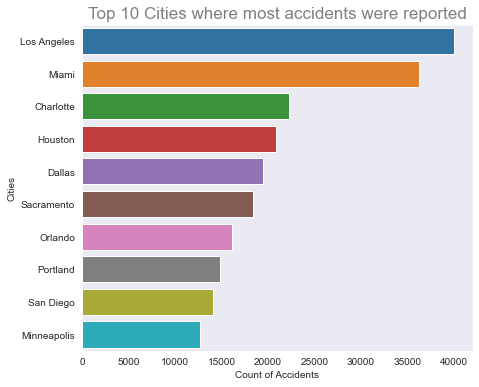

In [5]:
## Top 10 cities where most of the accidents were reported

top10_cities = accidentdata_eda['City'].value_counts().head(10)
top10_cities
plt.figure(figsize=(7,6))
sns.barplot(y=top10_cities.index, x=top10_cities)
plt.title("Top 10 Cities where most accidents were reported",size=17,color="grey")
plt.xlabel('Count of Accidents')
plt.ylabel('Cities')
plt.grid(axis='x')

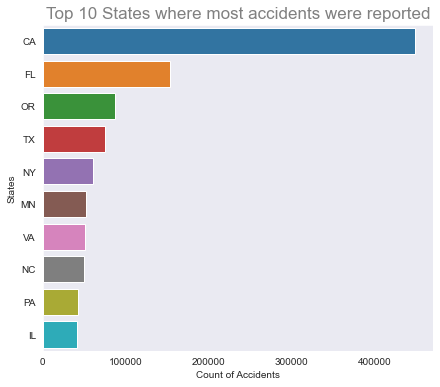

In [6]:
## Top 10 states where most number of accidents have occurred

top10_states = accidentdata_eda['State'].value_counts().head(10)
top10_states
plt.figure(figsize=(7,6))
sns.barplot(y=top10_states.index, x=top10_states)
plt.title("Top 10 States where most accidents were reported",size=17,color="grey")
plt.xlabel('Count of Accidents')
plt.ylabel('States')
plt.grid(axis='x')

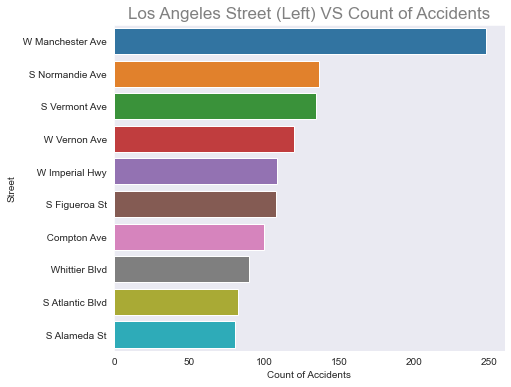

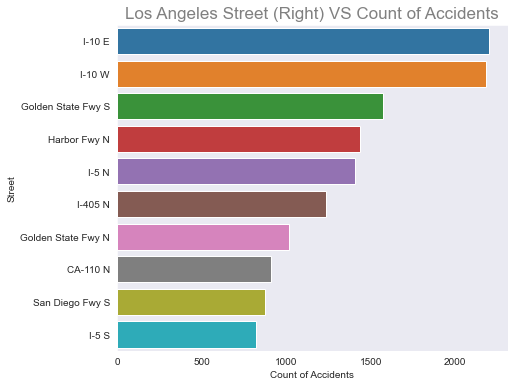

In [7]:
## Since most of the accidents occurred in Los Angeles city,
## we will find out by plotting which street and on which side of the street most of the 
## accidents have occurred

#accidentdata_eda = accidentdata_eda.dropna()

street_cnt_L = accidentdata_eda[(accidentdata_eda['City'] == 'Los Angeles') & (accidentdata_eda['Side']=='L')]['Street'].value_counts()
street_cnt_L = street_cnt_L.head(10)
street_cnt_L
plt.figure(figsize=(7,6))
sns.barplot(y=street_cnt_L.index, x=street_cnt_L)
plt.title("Los Angeles Street (Left) VS Count of Accidents",size=17,color="grey") 
plt.xlabel('Count of Accidents')
plt.ylabel('Street')
plt.grid(axis='x')

street_cnt_R = accidentdata_eda[(accidentdata_eda['City'] == 'Los Angeles') & (accidentdata_eda['Side']=='R')]['Street'].value_counts()
street_cnt_R = street_cnt_R.head(10)
street_cnt_R
plt.figure(figsize=(7,6))
sns.barplot(y=street_cnt_R.index, x=street_cnt_R)
plt.title("Los Angeles Street (Right) VS Count of Accidents",size=17,color="grey") 
plt.xlabel('Count of Accidents')
plt.ylabel('Street')
plt.grid(axis='x')

Start_Time
January      43.881754
December     46.348477
February     47.299590
March        53.301351
November     55.805596
April        59.720062
October      64.080208
May          68.116812
September    72.797114
June         76.021434
August       77.995167
July         79.715120
Name: Temperature(F), dtype: float64

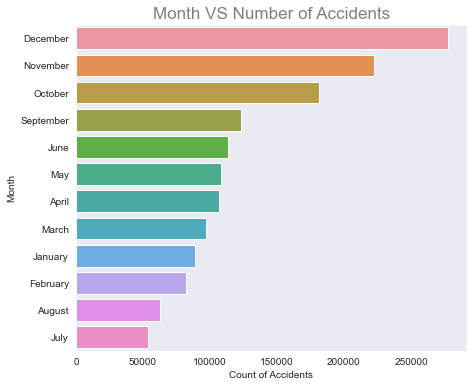

In [8]:
## Plot the month when most accidents have occurred


month_cnt = pd.to_datetime(accidentdata_eda.Start_Time).dt.month_name().value_counts()
month_cnt
plt.figure(figsize=(7,6))
sns.barplot(y=month_cnt.index, x=month_cnt)
plt.title("Month VS Number of Accidents",size=17,color="grey") 
plt.xlabel('Count of Accidents')
plt.ylabel('Month')
plt.grid(axis='x')

## Find the mean temperature for the months
mean_temp = accidentdata_eda.groupby(pd.to_datetime(accidentdata_eda.Start_Time).dt.month_name())['Temperature(F)'].mean().sort_values()
mean_temp

Text(0, 0.5, 'No. of accidents')

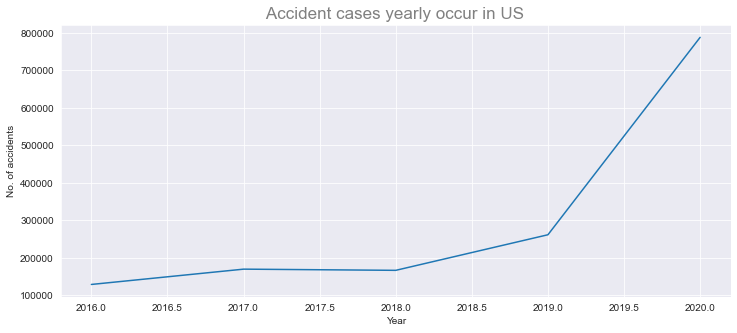

In [9]:
## Plot how accidents vary with every year

year_max_acc=pd.to_datetime(accidentdata_eda.Start_Time).dt.year.value_counts()
year_max_acc
plt.figure(figsize=(12,5))
sns.lineplot(data=year_max_acc)
plt.title(" Accident cases yearly occur in US ",size=17,color="grey")
plt.xlabel('Year')
plt.ylabel('No. of accidents')

Text(0, 0.5, 'Wind_Speed(mph)')

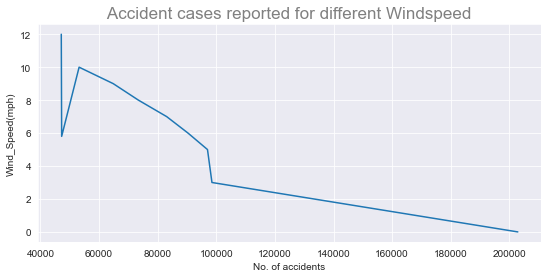

In [10]:
## Plot the effect of wind speed on the accidents

wspd_cnt = accidentdata_eda['Wind_Speed(mph)'].value_counts().head(10)
wspd_cnt
plt.figure(figsize=(9,4))
sns.lineplot(y=wspd_cnt.index, x=wspd_cnt)
plt.title(" Accident cases reported for different Windspeed ",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Wind_Speed(mph)')

Text(0, 0.5, 'Weather Condition')

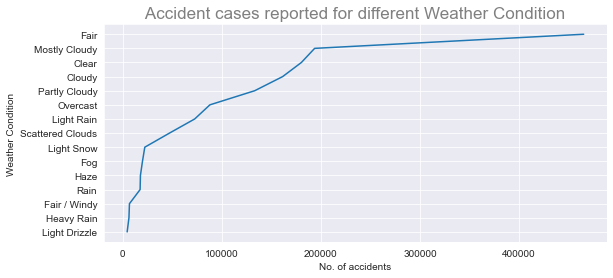

In [11]:
## Plot the effect of weather on number of accidents

weather_cond=accidentdata_eda["Weather_Condition"].value_counts().head(15)
weather_cond
plt.figure(figsize=(9,4))
sns.lineplot(y=weather_cond.index, x=weather_cond)
plt.title(" Accident cases reported for different Weather Condition ",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Weather Condition')

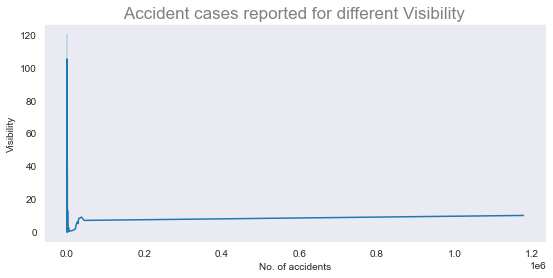

In [12]:
## Effect of visibility on accidents

visibility_eff=accidentdata_eda["Visibility(mi)"].value_counts()
visibility_eff
plt.figure(figsize=(9,4))
sns.lineplot(y=visibility_eff.index, x=visibility_eff)
plt.title(" Accident cases reported for different Visibility ",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Visibility')
plt.grid()

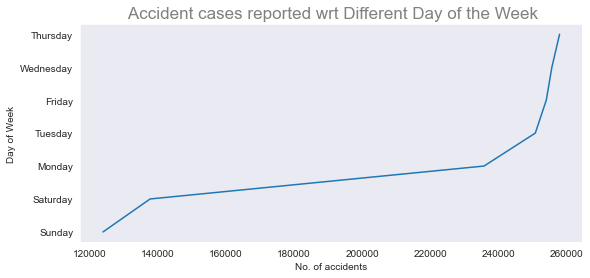

In [13]:
## Plot the number of accidents wrt day of the week

day_cnt = pd.to_datetime(accidentdata_eda.Start_Time).dt.day_name().value_counts()
day_cnt
plt.figure(figsize=(9,4))
sns.lineplot(y=day_cnt.index, x=day_cnt)
plt.title(" Accident cases reported wrt Different Day of the Week",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Day of Week')
plt.grid()

Text(0, 0.5, 'Cities')

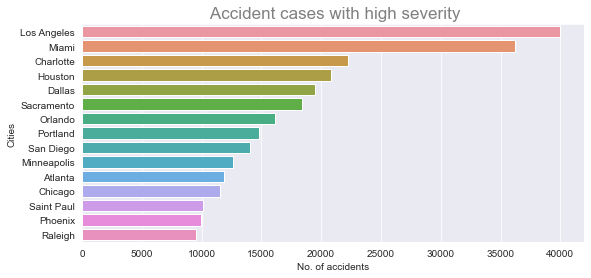

In [14]:
## Cities with high severity accidents

accidentdata_eda_high = accidentdata_eda[(accidentdata_eda['Severity'] == '3') | (accidentdata_eda['Severity'] == '4')]
city_hsev = accidentdata_eda.groupby('City')['City'].count().sort_values(ascending=False).head(15)
plt.figure(figsize=(9,4))
sns.barplot(y=city_hsev.index, x=city_hsev)
plt.title(" Accident cases with high severity",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Cities')

Text(0, 0.5, 'Cities')

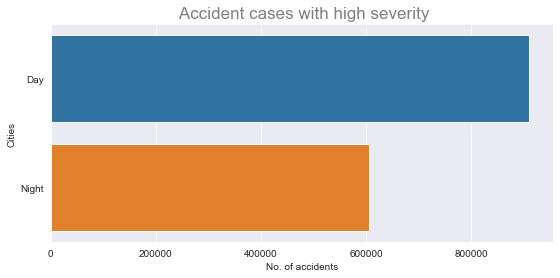

In [15]:
## Cities with high severity accidents

dn_acc_both = accidentdata_eda[(accidentdata_eda['Sunrise_Sunset'] == 'Day') | (accidentdata_eda['Sunrise_Sunset'] == 'Night')]
dn_acc = dn_acc_both['Sunrise_Sunset'].value_counts()
plt.figure(figsize=(9,4))
sns.barplot(y=dn_acc.index, x=dn_acc)
plt.title(" Accident cases with high severity",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Cities')

## Correlation matrix

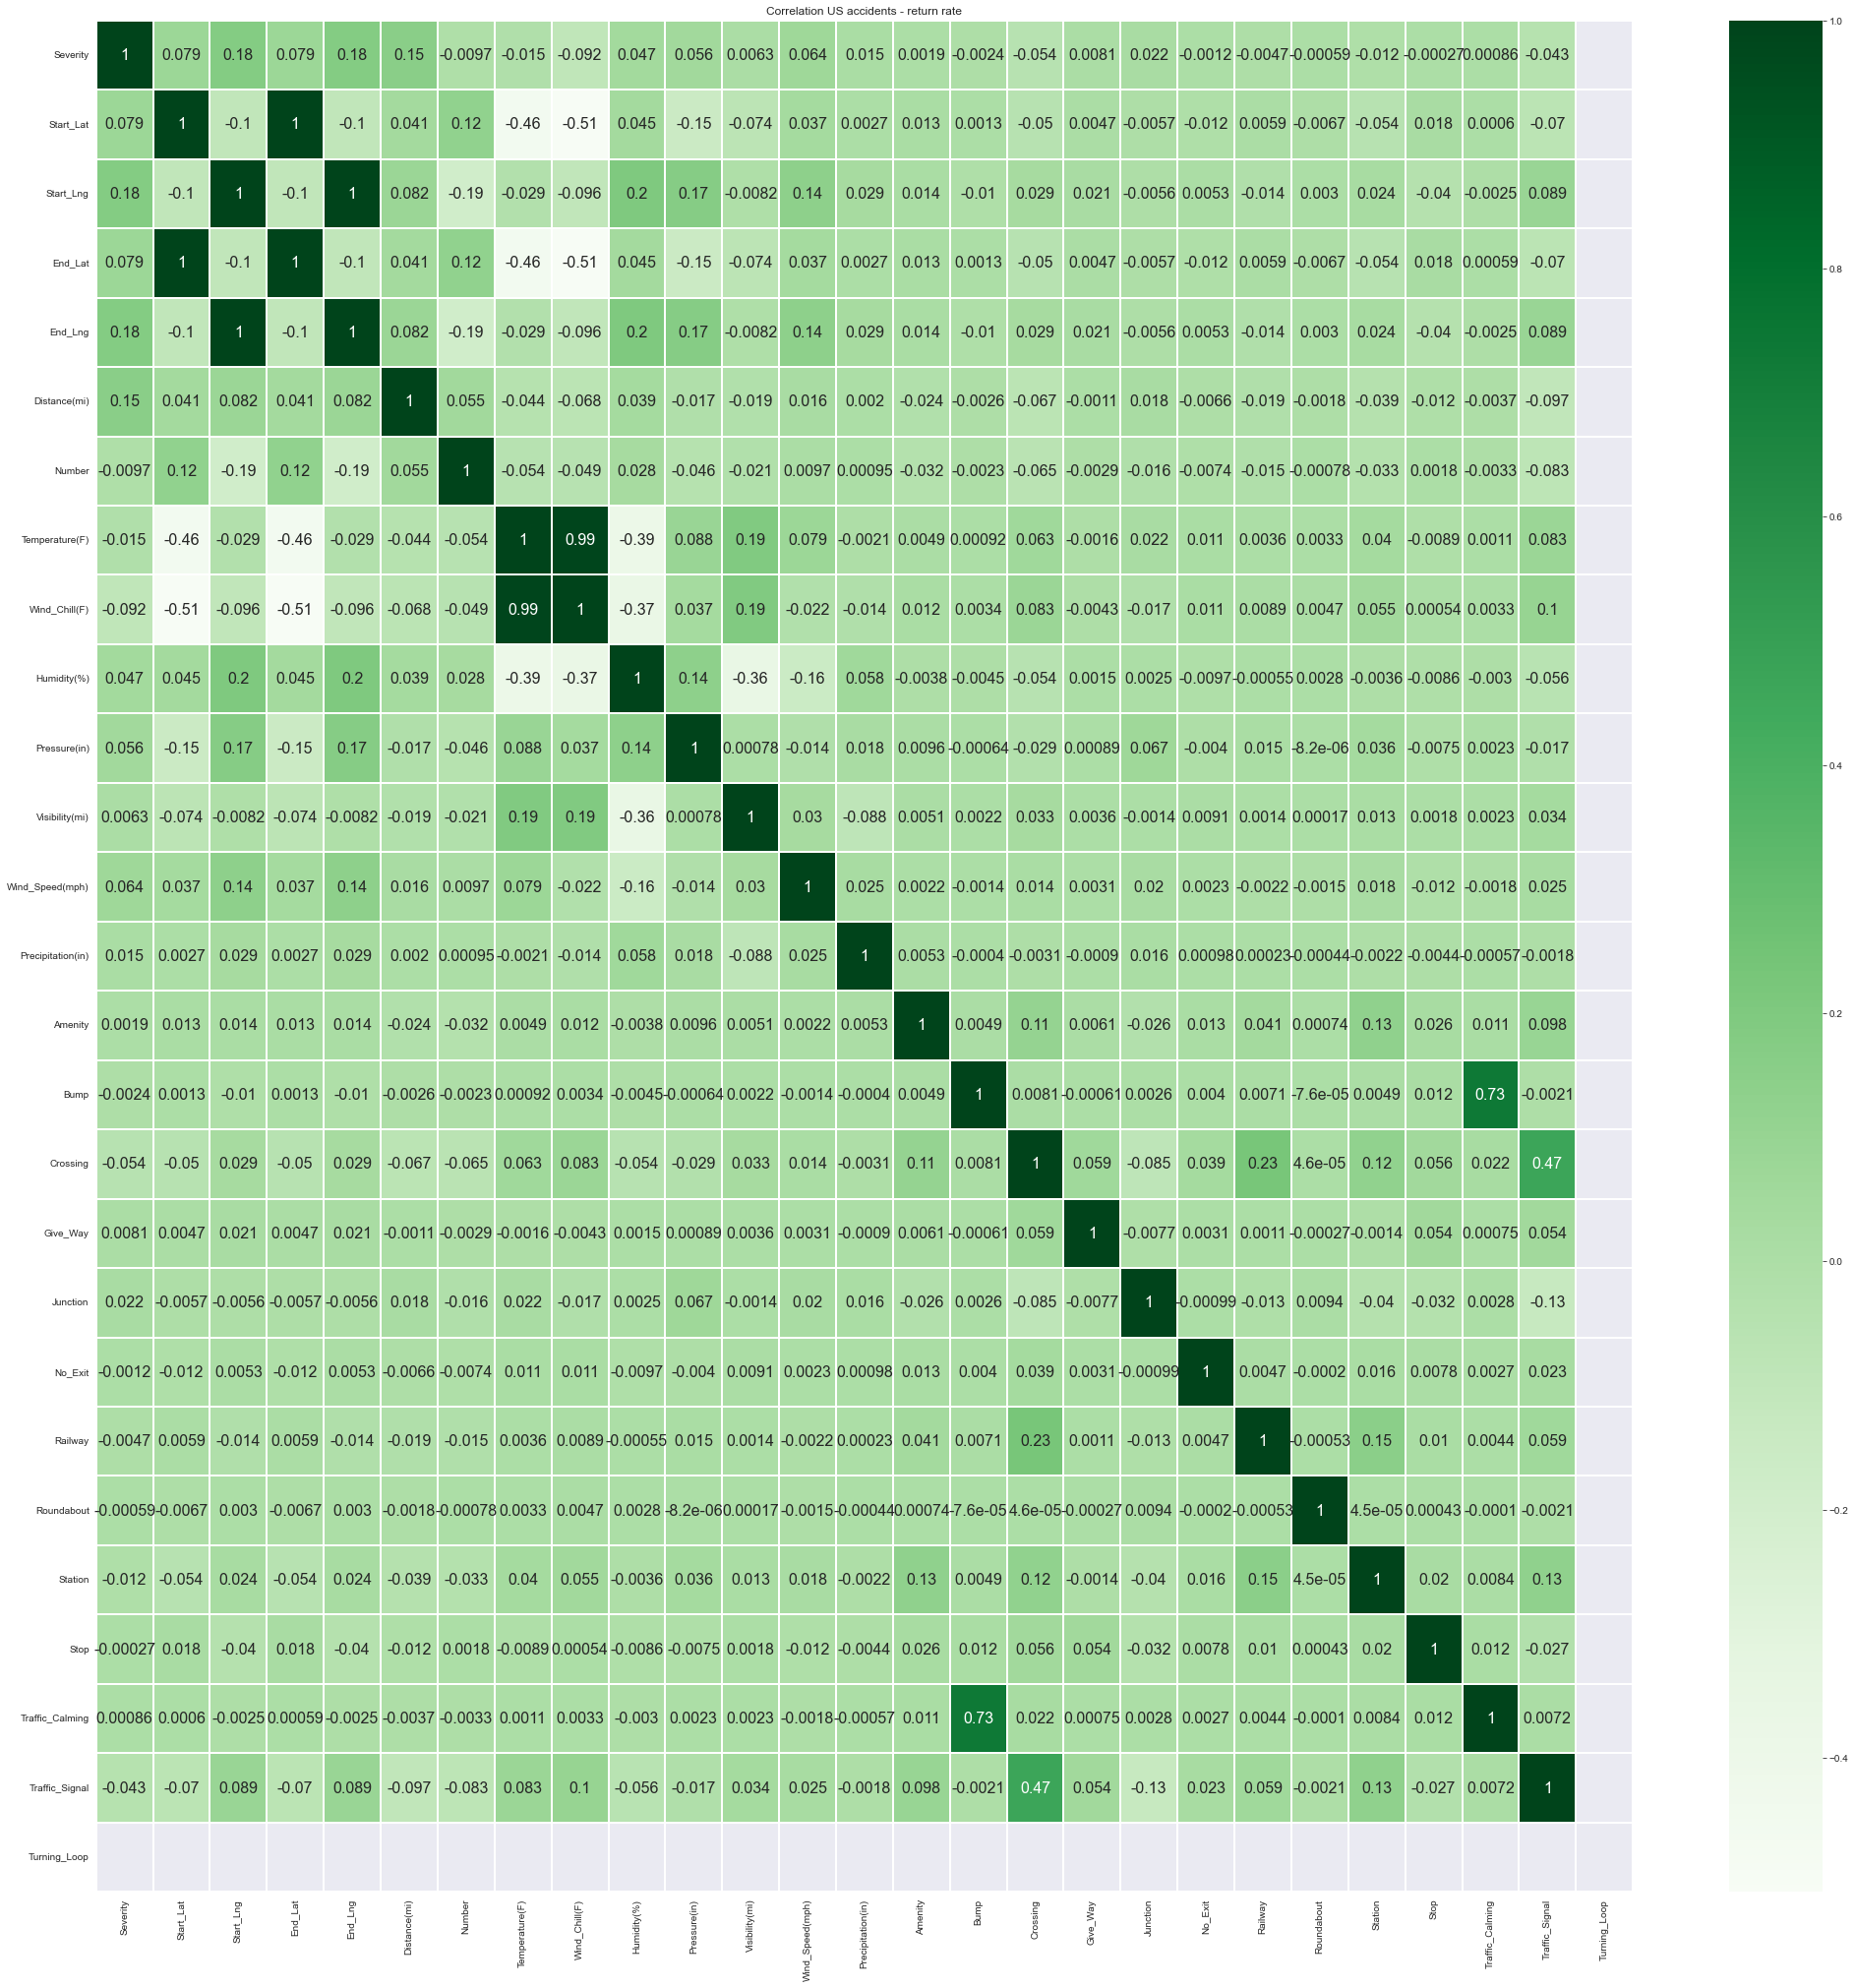

In [16]:
accidentdata_corr = accidentdata_raw.copy()

plt.figure(figsize=(35, 35))
sns.heatmap(accidentdata_corr.corr(), annot=True, cmap="Greens", linewidths=0.1, annot_kws={"fontsize":16})
plt.title("Correlation US accidents - return rate");

## Data Cleaning and Pre-processing

In [17]:
## Copy the raw data to perform data pre-processing

accidentdata_pp = accidentdata_raw.copy()

In [18]:
## There are 10 columns whose values are almost entirely False.
## Hence, they do not have much effect on the severity of the accident

accidentdata_pp = accidentdata_pp.drop(columns=['Amenity', 'Bump', 'Stop', 'Give_Way', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Traffic_Calming', 'Turning_Loop'],axis=1)

## Dropping additional columns
accidentdata_pp = accidentdata_pp.drop(columns=['Nautical_Twilight', 'Astronomical_Twilight', 'Civil_Twilight'],axis=1)
accidentdata_pp = accidentdata_pp.drop(columns=['ID', 'Country', 'State', 'County', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'End_Lat','End_Lng', 'Number'],axis=1)

In [19]:
## Replacing na values with the mean value

accidentdata_pp['Wind_Chill(F)'].fillna(value = accidentdata_pp['Wind_Chill(F)'].mean(),inplace = True)
accidentdata_pp['Wind_Speed(mph)'].fillna(value = accidentdata_pp['Wind_Speed(mph)'].mean(),inplace = True)
accidentdata_pp['Visibility(mi)'].fillna(accidentdata_pp['Visibility(mi)'].mean(),inplace = True)
accidentdata_pp['Precipitation(in)'].fillna(accidentdata_pp['Precipitation(in)'].mean(),inplace = True) 
accidentdata_pp['Temperature(F)'].fillna(accidentdata_pp['Temperature(F)'].mean(),inplace = True)
accidentdata_pp['Humidity(%)'].fillna(accidentdata_pp['Humidity(%)'].mean(),inplace = True)
accidentdata_pp['Pressure(in)'].fillna(accidentdata_pp['Pressure(in)'].mean(),inplace = True)

In [20]:
## Converting date time values into useful data

accidentdata_pp['Start_Time']=pd.to_datetime(accidentdata_pp['Start_Time'],infer_datetime_format=True)
accidentdata_pp['End_Time']=pd.to_datetime(accidentdata_pp['End_Time'],infer_datetime_format=True)

accidentdata_pp['Year'] = accidentdata_pp['Start_Time'].dt.year
accidentdata_pp['Month'] = accidentdata_pp['Start_Time'].dt.month
accidentdata_pp['Day'] = accidentdata_pp['Start_Time'].dt.day
accidentdata_pp['Time_S'] = accidentdata_pp['Start_Time'].dt.hour
accidentdata_pp['Weekday']=accidentdata_pp['Start_Time'].dt.weekday
accidentdata_pp['Duration'] = accidentdata_pp['End_Time']-accidentdata_pp['Start_Time']
accidentdata_pp['Duration'] = accidentdata_pp['Duration'].apply(lambda x : x.total_seconds())

accidentdata_pp.drop(columns=['Start_Time','End_Time'],axis=1,inplace=True) # Dropping these columns as they are no longer required

In [21]:
## Replacing column values

accidentdata_pp = accidentdata_pp[~accidentdata_pp['Weather_Condition'].isnull()]
accidentdata_pp = accidentdata_pp[~accidentdata_pp['Wind_Direction'].isnull()]

accidentdata_pp['Wind_Direction'].replace('Calm','CALM',inplace=True)
accidentdata_pp['Wind_Direction'].replace('North','N',inplace=True)
accidentdata_pp['Wind_Direction'].replace('South','S',inplace=True)
accidentdata_pp['Wind_Direction'].replace('East','E',inplace=True)
accidentdata_pp['Wind_Direction'].replace('West','W',inplace=True)
accidentdata_pp['Wind_Direction'].replace('Variable','VAR',inplace=True)

#Binning of time of the day and seasons
timeBins=[-1,6,12,18,24]
tBin_names=['Early Morning','Morning','Afternoon','Evening']
accidentdata_pp['TimeofDay']=pd.cut(accidentdata_pp['Time_S'],timeBins,labels=tBin_names)
seasonBins=[-1,2,5,8,11,12]
sBin_names=['Winter','Spring','Summer','Autumn','Winter']
accidentdata_pp['Season']=pd.cut(accidentdata_pp['Month'],seasonBins,labels=sBin_names,ordered=False)
    
seasonBins=[-1,4,6]
sBin_names=['Weekday','Weekend']
accidentdata_pp['Day_Type']=pd.cut(accidentdata_pp['Weekday'],seasonBins,labels=sBin_names,ordered=False)

accidentdata_pp = accidentdata_pp[~(accidentdata_pp['Side'] == ' ')]
    
accidentdata_pp['Sunrise_Sunset'].replace('Night',0,inplace=True)
accidentdata_pp['Sunrise_Sunset'].replace('Day',1,inplace=True)

accidentdata_pp['Side'].replace('L',0,inplace=True)
accidentdata_pp['Side'].replace('R',1,inplace=True)
    
accidentdata_pp = accidentdata_pp[~(accidentdata_pp['Duration'] <= 0 )]
    
#We further clean wind direction by grouping similar values into one
accidentdata_pp.loc[accidentdata_pp['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
accidentdata_pp.loc[(accidentdata_pp['Wind_Direction']=='West')|(accidentdata_pp['Wind_Direction']=='WSW')|(accidentdata_pp['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
accidentdata_pp.loc[(accidentdata_pp['Wind_Direction']=='South')|(accidentdata_pp['Wind_Direction']=='SSW')|(accidentdata_pp['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
accidentdata_pp.loc[(accidentdata_pp['Wind_Direction']=='North')|(accidentdata_pp['Wind_Direction']=='NNW')|(accidentdata_pp['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
accidentdata_pp.loc[(accidentdata_pp['Wind_Direction']=='East')|(accidentdata_pp['Wind_Direction']=='ESE')|(accidentdata_pp['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
accidentdata_pp.loc[accidentdata_pp['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
    
    
weather ='!'.join(accidentdata_pp['Weather_Condition'].dropna().unique().tolist())
    
#We clean weather condition by dividing all the values into the below 7 categories
accidentdata_pp['Clear'] = np.where(accidentdata_pp['Weather_Condition'].str.contains('Clear', case=False, na = False), 1, 0)
accidentdata_pp['Cloud'] = np.where(accidentdata_pp['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), 1, 0)
accidentdata_pp['Rain'] = np.where(accidentdata_pp['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), 1, 0)
accidentdata_pp['Heavy_Rain'] = np.where(accidentdata_pp['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), 1, 0)
accidentdata_pp['Snow'] = np.where(accidentdata_pp['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), 1, 0)
accidentdata_pp['Heavy_Snow'] = np.where(accidentdata_pp['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), 1, 0)
accidentdata_pp['Fog'] = np.where(accidentdata_pp['Weather_Condition'].str.contains('Fog', case=False, na = False), 1, 0)

# Assign NA to created weather features where 'Weather_Condition' is null.
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
    accidentdata_pp.loc[accidentdata_pp['Weather_Condition'].isnull(),i] = accidentdata_pp.loc[accidentdata_pp['Weather_Condition'].isnull(),'Weather_Condition']

accidentdata_pp.loc[:,['Weather_Condition'] + weather]

accidentdata_pp = accidentdata_pp.drop(['Weather_Condition'], axis=1)
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for w in weather:
    accidentdata_pp[w]=accidentdata_pp[w].astype(int)
    
featuers_removed=['Description', 'Street','Zipcode','Source','Year', 'Month', 'Day', 'Time_S', 'Weekday']

features=['Severity', 'Distance(mi)', 'Side','Temperature(F)','Wind_Chill(F)', 'Humidity(%)',
          'Pressure(in)', 'Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
          'Precipitation(in)','Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog', 'Junction', 'Crossing', 
          'Traffic_Signal','Sunrise_Sunset','TimeofDay', 'Season', 'Day_Type','Duration'] 


#One-Hot Encoding 
accidentdata_pp_Dummy=pd.get_dummies(accidentdata_pp[features],drop_first=True)
    
accidentdata_pp_ML = accidentdata_pp_Dummy.reset_index()
accidentdata_pp_ML=accidentdata_pp_ML.drop('index',axis=1)
accidentdata_pp_ML.fillna(0,inplace = True)

In [101]:
accidentdata_pp_ML.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          Severity  Distance(mi)   Side  Temperature(F)  Wind_Chill(F)  \
0           False         False  False           False          False   
1           False         False  False           False          False   
2           False         False  False           False          False   
3           False         False  False           False          False   
4           False         False  False           False          False   
...           ...           ...    ...             ...            ...   
1464495     False         False  False           False          False   
1464496     False         False  False           False          False   
1464497     False         False  False           False          False   
1464498     False         False  False           False          False   
1464499     False         False  False           False          False   

         Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Spee

## Cross validation

In [94]:
target = 'Severity'

In [95]:
# Using Random Forest
rfe = RandomForestClassifier(max_depth=15)
acc_scores = cross_val_score(rfe, accidentdata_pp_ML.drop(target, axis=1), accidentdata_pp_ML[target], cv=10)
print(acc_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acc_scores.mean(), acc_scores.std()))

[0.80404234 0.81333561 0.81308296 0.80980539 0.80879481 0.65944008
 0.72372141 0.79679754 0.41804029 0.79694094]
0.74 accuracy with a standard deviation of 0.12


In [96]:
pickle.dump(rfe, open('rfe_cv.pkl', 'wb'))

In [97]:
# Using KNN
knn = KNeighborsClassifier(n_neighbors=21)
acc_scores = cross_val_score(rfe, accidentdata_pp_ML.drop(target, axis=1), accidentdata_pp_ML[target], cv=10)
print(acc_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acc_scores.mean(), acc_scores.std()))

[0.80330488 0.81263913 0.8128508  0.8102424  0.80863093 0.66139297
 0.71821782 0.7978491  0.4160874  0.79684534]
0.74 accuracy with a standard deviation of 0.12


In [98]:
pickle.dump(knn, open('knn_cv.pkl', 'wb'))

In [99]:
# Using Naive Bayes
gnb = GaussianNB()
acc_scores = cross_val_score(gnb, accidentdata_pp_ML.drop(target, axis=1), accidentdata_pp_ML[target], cv=10)
print(acc_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acc_scores.mean(), acc_scores.std()))

[0.81714578 0.76030727 0.72919085 0.72960737 0.70779788 0.42206214
 0.53951519 0.44917719 0.5944213  0.59042677]
0.63 accuracy with a standard deviation of 0.13


In [100]:
pickle.dump(gnb, open('gnb_cv.pkl', 'wb'))

## Split the dataset

In [26]:
target = 'Severity'
y=accidentdata_pp_ML[target]
X=accidentdata_pp_ML.drop(target, axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [28]:
## Scaling the dataset using MinMaxScaler

scaler = MinMaxScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
    
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])


## Models

## Random Forest Classifier

In [29]:
rfe = RandomForestClassifier(max_depth=15)
y_pred_rfe=rfe.fit(X_train, y_train).predict(X_test)
print(y_pred_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print('The accuracy of the Random Forest Model is', accuracy_rfe)

[2 2 2 ... 2 2 2]
The accuracy of the Random Forest Model is 0.822285194036645


In [46]:
pickle.dump(rfe, open('rfe.pkl', 'wb'))

In [30]:
print('The classification report of Random Forest is: \n')
print(classification_report(y_test,y_pred_rfe))

The classification report of Random Forest is: 

              precision    recall  f1-score   support

           1       0.91      0.29      0.44      8171
           2       0.83      0.99      0.90    351072
           3       0.70      0.08      0.15     46974
           4       0.71      0.19      0.30     33133

    accuracy                           0.82    439350
   macro avg       0.79      0.39      0.45    439350
weighted avg       0.81      0.82      0.77    439350



The cofusion matrix for random forest is [[  2360   5702     99     10]
 [   131 348704    907   1330]
 [    63  41859   3808   1244]
 [    40  26101    593   6399]]
The confusion matrix plot is:


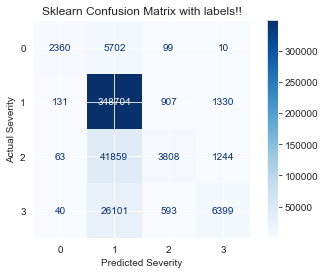

In [31]:
cm_rf = confusion_matrix(y_test, y_pred_rfe)
print('The cofusion matrix for random forest is', cm_rf)
print('The confusion matrix plot is:')
cmd_obj = ConfusionMatrixDisplay(cm_rf)
cmd_obj.plot(cmap='Blues')
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted Severity', 
                ylabel='Actual Severity')
plt.show()

## Naive Bayes

In [32]:
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
print(y_pred_gnb)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred_gnb).sum()))
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(accuracy_gnb)

[1 1 1 ... 1 1 2]
Number of mislabeled points out of a total 439350 points : 258443
0.4117605553658814


In [47]:
pickle.dump(gnb, open('gnb.pkl', 'wb'))

In [33]:
print('The classification report of Naive Bayes model is: \n')
print(classification_report(y_test,y_pred_gnb))

The classification report of Naive Bayes model is: 

              precision    recall  f1-score   support

           1       0.04      0.97      0.08      8171
           2       0.83      0.46      0.59    351072
           3       0.18      0.15      0.16     46974
           4       0.24      0.10      0.14     33133

    accuracy                           0.41    439350
   macro avg       0.32      0.42      0.24    439350
weighted avg       0.70      0.41      0.50    439350



The cofusion matrix for naive bayes is [[  7924    114     79     54]
 [152366 162746  27033   8927]
 [ 19839  18897   6891   1347]
 [ 10927  15377   3483   3346]]
The confusion matrix plot is:


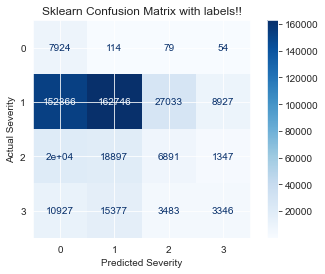

In [34]:
cm_nb = confusion_matrix(y_test, y_pred_gnb)
print('The cofusion matrix for naive bayes is', cm_nb)
print('The confusion matrix plot is:')
cmd_obj = ConfusionMatrixDisplay(cm_nb)
cmd_obj.plot(cmap='Blues')
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted Severity', 
                ylabel='Actual Severity')
plt.show()

## kNN

In [35]:
knn = KNeighborsClassifier(n_neighbors=21)
y_pred_knn=knn.fit(X_train, y_train).predict(X_test)
print(y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(accuracy_knn)

[2 2 2 ... 2 2 2]
0.8019255718675316


In [48]:
pickle.dump(knn, open('knn.pkl', 'wb'))

In [36]:
print('The classification report of kNN model is: \n')
print(classification_report(y_test,y_pred_knn))

The classification report of kNN model is: 

              precision    recall  f1-score   support

           1       0.65      0.20      0.30      8171
           2       0.81      0.99      0.89    351072
           3       0.40      0.06      0.11     46974
           4       0.44      0.05      0.08     33133

    accuracy                           0.80    439350
   macro avg       0.58      0.32      0.35    439350
weighted avg       0.74      0.80      0.74    439350



The cofusion matrix for kNN is [[  1616   6251    264     40]
 [   585 346246   2968   1273]
 [   133  43264   2906    671]
 [   141  30226   1208   1558]]
The confusion matrix plot is:


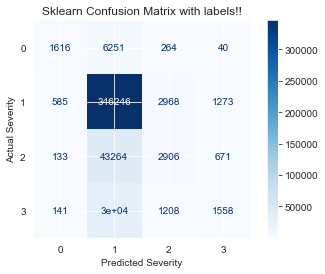

In [37]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print('The cofusion matrix for kNN is', cm_knn)
print('The confusion matrix plot is:')
cmd_obj = ConfusionMatrixDisplay(cm_knn)
cmd_obj.plot(cmap='Blues')
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted Severity', 
                ylabel='Actual Severity')
plt.show()

# OneVsRestClassifier

In [38]:
# OneVsRestClassifier model
ovr = OneVsRestClassifier(DecisionTreeClassifier(random_state=0))
y_pred_prob_ovr=ovr.fit(X_train, y_train).predict_proba(X_test)
# print(y_pred_ovr)
# type(y_pred_ovr)
y_pred_ovr = ovr.predict(X_test)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print(accuracy_ovr)

C:\Users\soumy\anaconda3\lib\site-packages\sklearn\multiclass.py:487: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


0.7545032434277911


In [49]:
pickle.dump(ovr, open('ovr.pkl', 'wb'))

In [39]:
print('The classification report of OneVsRestClassifier model is: \n')
print(classification_report(y_test,y_pred_ovr))

The classification report of OneVsRestClassifier model is: 

              precision    recall  f1-score   support

           1       0.74      0.50      0.59      8171
           2       0.92      0.82      0.87    351072
           3       0.39      0.36      0.37     46974
           4       0.28      0.65      0.39     33133

    accuracy                           0.75    439350
   macro avg       0.58      0.58      0.56    439350
weighted avg       0.81      0.75      0.78    439350



The cofusion matrix for OnevsRest is [[  4047   1867    824   1433]
 [   931 289065  22258  38818]
 [   377  14691  16950  14956]
 [    94   7878   3732  21429]]
The confusion matrix plot is:


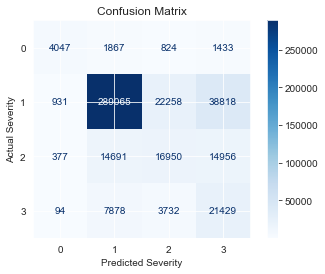

In [53]:
cm_ovr = confusion_matrix(y_test, y_pred_ovr)
print('The cofusion matrix for OnevsRest is', cm_ovr)
print('The confusion matrix plot is:')
cmd_obj = ConfusionMatrixDisplay(cm_ovr)
cmd_obj.plot(cmap='Blues')
cmd_obj.ax_.set(
                title='Confusion Matrix', 
                xlabel='Predicted Severity', 
                ylabel='Actual Severity')
plt.show()

# ROC - AUC Curve

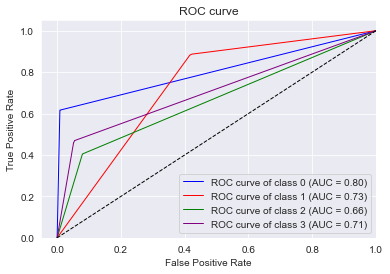

In [93]:
# To plot the multi-class ROC need to have 1-D array output
y = label_binarize(y, classes=[1,2,3,4])
n_classes = y.shape[1]

# Pass the binary 'y' to split the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=0))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# print(y_score)
# y_test
# print(type(y_score))
# y_score
# y_score = np.array(y_pred_prob_ovr)
# type(y_pred_prob_ovr)
# print(len(y_test),len(y_pred_prob_ovr),len(y_score))
# print(y_test.shape,y_pred_prob_ovr.shape,y_score.shape)
# print(y_test)
# print(y_pred_prob_ovr)
#y_test=label_binarize(y_test, classes=[1,2,3,4])
# n_classes = 4 # no of ROC curves

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 1
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of severity {0} (AUC = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

#Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()